In [2]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
## set param
to_ws = '/Users/ryotaro/Desktop/kamei/'
dir_ana = 'kaiseki7/'
dir_save = 'result/'

simulation_state = 'control'
#simulation_state = 'withoutIn'

csv = '.csv'
jpg = '.jpg'

nameDD = 'DD'
nameMD = 'MD'

fig_xlim, fig_ylim = (8000,30000), (-0.3,0.3)

name_0 = '_0ms'
name_p5, name_m5 = '_5ms', '_-5ms'
name_p10, name_m10 = '_10ms', '_-10ms'
name_p20, name_m20 = '_20ms', '_-20ms'
name_p40, name_m40 = '_40ms', '_-40ms'

## [pm_flag, name, dt, index]
params = np.array([[None, name_0,    None, 4], #0
                                   ["+", name_p5,    1000, 5], #1
                                   ["-", name_m5,    1000, 3], #2
                                   ["+", name_p10, 2000, 6], #3
                                   ["-", name_m10, 2000, 2], #4
                                   ["+", name_p20, 4000, 7], #5
                                   ["-", name_m20, 4000, 1], #6
                                   ["+", name_p40, 8000, 8], #7
                                   ["-", name_m40, 8000, 0],]) #8

## 辞書でパラメータを管理しようかという試み
#params = [{'name':name_m40, 'dt':8000, 'ArtificalData_1':DD, 'ArtificalData_2':[DD, MD], 'index':0},
#                   {'name':name_m20, 'dt':4000, 'ArtificalData_1':DD, 'ArtificalData_2':[DD, MD], 'index':1},
#                   {'name':name_m10, 'dt':2000, 'ArtificalData_1':DD, 'ArtificalData_2':[DD, MD], 'index':2},
#                   {'name':name_m5, 'dt':1000, 'ArtificalData_1':DD, 'ArtificalData_2':[DD, MD], 'index':3},
#                   {'name':name_0 , 'dt':None , 'ArtificalData_1':None  , 'ArtificalData_2':None , 'index':4},
#                   {'name':name_p5, 'dt':1000, 'ArtificalData_1':MD, 'ArtificalData_2':[MD, DD], 'index':5},
#                   {'name':name_p10, 'dt':2000, 'ArtificalData_1':MD, 'ArtificalData_2':[MD, DD], 'index':6},
#                   {'name':name_p20, 'dt':4000, 'ArtificalData_1':MD, 'ArtificalData_2':[MD, DD], 'index':7},
#                   {'name':name_p40, 'dt':8000, 'ArtificalData_1':MD, 'ArtificalData_2':[MD, DD], 'index':8}]

## use for result fig
row_time = [-40, -20, -10, -5, 0, 5, 10, 20, 40]

In [4]:
## create a directory for saving
dir_save_full = to_ws+dir_ana+dir_save+simulation_state+'/'
os.makedirs(dir_save_full, exist_ok=True)

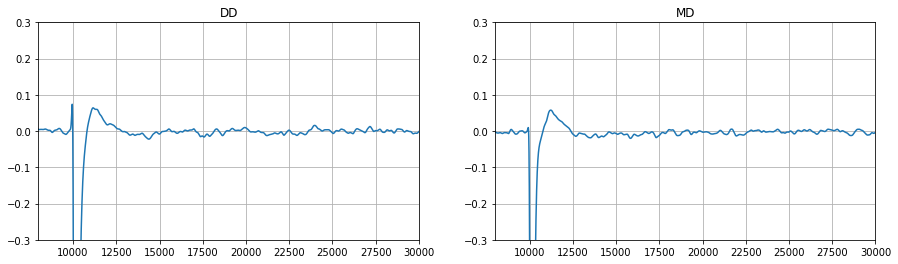

In [5]:
## figure init
fig = plt.figure(figsize=(15, 4))
ax_DD = fig.add_subplot(1, 2, 1, title=nameDD, xlim=fig_xlim, ylim=fig_ylim)
ax_MD = fig.add_subplot(1, 2, 2, title=nameMD, xlim=fig_xlim, ylim=fig_ylim)
ax_DD.grid()
ax_MD.grid()

# DD
DD = np.loadtxt(to_ws+dir_ana+nameDD+csv, delimiter=',')
row = len(DD)
zerosDD = np.zeros(row)
ave_bias = np.abs(np.mean(zerosDD))
DD = DD + ave_bias

# MD
MD= np.loadtxt(to_ws+dir_ana+nameMD+csv, delimiter=',')
MD = MD + ave_bias

# show DD and MD
ax_DD.plot(DD)
ax_MD.plot(MD)

#save fig
fig.savefig(dir_save_full+simulation_state+'_DDandMD.jpg')

MODE :  control
Work Space :  /Users/ryotaro/Desktop/kamei/
Save Space :  /Users/ryotaro/Desktop/kamei/kaiseki7/result/control/


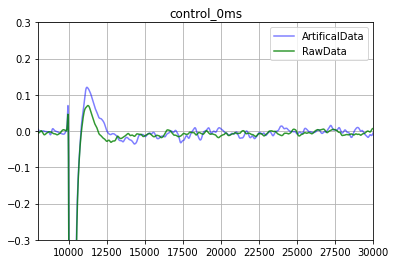

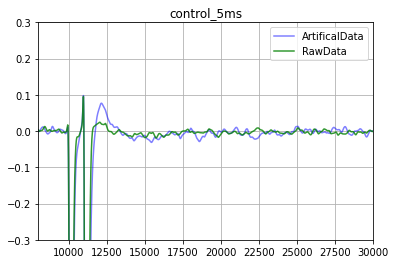

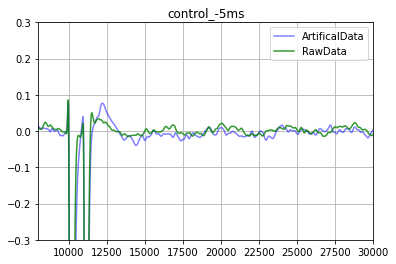

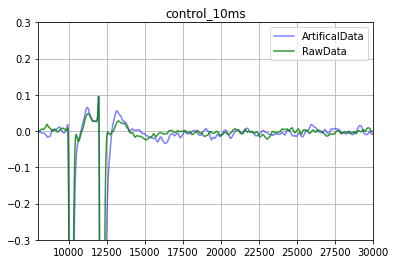

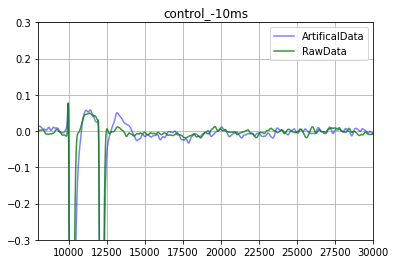

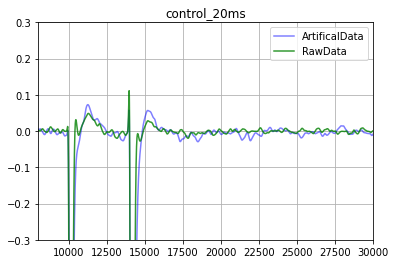

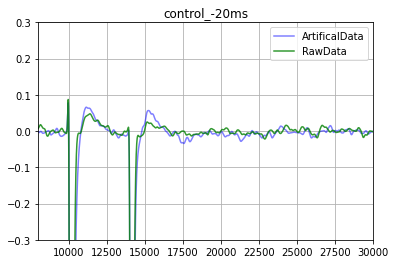

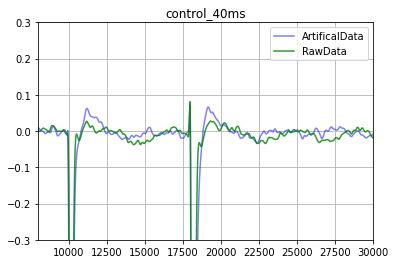

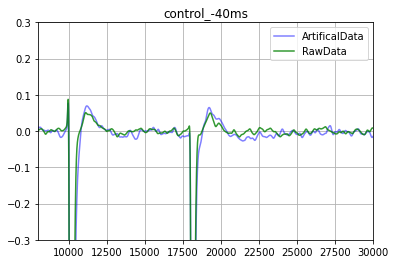

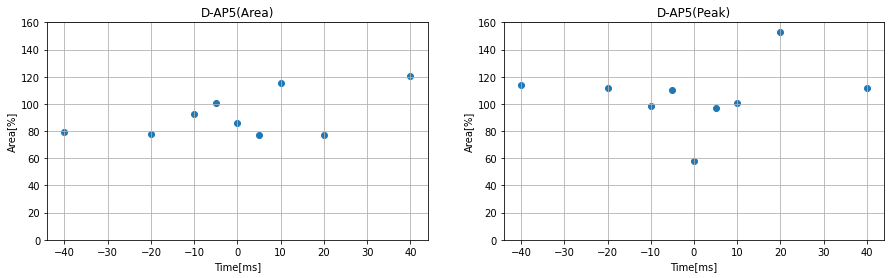

In [5]:
print("MODE : ", simulation_state)
print("Work Space : ", to_ws)
print("Save Space : ", dir_save_full)

## init variables
#理論波形作成用
ArtificalData = np.zeros(row)

#ピーク値格納用
afPeakResult = np.zeros(9)
rdPeakResult = np.zeros(9)
summennseki1=np.zeros(9) #面積比格納(理論値)
summennseki2=np.zeros(9) #面積比格納(実測値)

#ピーク値の比の格納用
PeakResult = np.zeros(9)

## calc
for prm in params:
    pm_flag, name, dt, index = prm
    # 0 (ms)
    if pm_flag is None:
        ArtificalData = DD + MD
    # -5, -10, -20, -40 (ms)
    elif pm_flag == '-':
        i, j = 0, 0
        for num1 in range(dt):
            ArtificalData[i] = DD[i]
            i += 1
        for num2 in range(row-dt):
            ArtificalData[i] = DD[i] + MD[j]
            i += 1
            j += 1
    # +5, +10, +20, +40 (ms)
    elif pm_flag == '+':
        i, j = 0, 0
        for num1 in range(dt):
            ArtificalData[i] = MD[i]
            i += 1
        for num2 in range(row-dt):
            ArtificalData[i] = MD[i] + DD[j]
            i += 1
            j += 1
    
    file_name=to_ws+dir_ana+simulation_state+name+csv
    RawData = np.loadtxt(file_name, delimiter=',') + ave_bias
    
    afPeakResult[index] = ArtificalData.max()
    rdPeakResult[index] = RawData.max()
    summennseki1[index] = np.sum(np.abs(ArtificalData))
    summennseki2[index] = np.sum(np.abs(RawData))
    
    #show fig
    plt.plot(ArtificalData, label="ArtificalData", color="b", alpha=.5)
    plt.plot(RawData, label="RawData", color="g", alpha=.8)
    plt.title(simulation_state+name)
    plt.xlim(fig_xlim)
    plt.ylim(fig_ylim)
    plt.legend()
    plt.grid()
    #save fig
    plt.savefig(dir_save_full+simulation_state+name+jpg)
    plt.show()
    
PeakResult = rdPeakResult / afPeakResult
SumResult = summennseki2 / summennseki1

######## RESULT ########
fig = plt.figure(figsize=(15, 4))
if simulation_state == 'control':
    title_area = 'D-AP5(Area)'
    title_peak = 'D-AP5(Peak)'
    save_title = "D-AP5_result"
else:
    title_area = 'D-AP5+picrotoxin(Area)'
    title_peak = 'D-AP5+picrotoxin(Peak)'
    save_title = "D-AP5+picrotoxin_result"
    
ax_area = fig.add_subplot(1, 2, 1, title=title_area, ylim=(0, 160))
ax_peak = fig.add_subplot(1, 2, 2, title=title_peak, ylim=(0, 160))

ax_area.scatter(row_time, SumResult*100)
ax_peak.scatter(row_time, PeakResult*100)

ax_area.set_xlabel("Time[ms]")
ax_area.set_ylabel("Area[%]")
ax_area.grid()

ax_peak.set_xlabel("Time[ms]")
ax_peak.set_ylabel("Area[%]")
ax_peak.grid()

#save fig
fig.savefig(dir_save_full+simulation_state+save_title+jpg)